In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

Theo như kết quả từ việc phân tích các feature đã làm trước đó, nhóm đã rút ra được 10 features có ảnh hưởng đến khả năng dự đoán của mô hình. Từ bộ dữ liệu ban đầu, nhóm đã rút các features không cần thiết để tạo nên bộ dữ liệu chỉ chứa các features cần thiết để tạo nên một mô hình scorecard để phục vụ cho việc xét duyệt khoản vay

In [2]:
data = pd.read_csv("./cleaned_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   20000 non-null  int64  
 1   label                         20000 non-null  int64  
 2   NUMBER_OF_LOANS               20000 non-null  float64
 3   NUMBER_OF_RELATIONSHIP_BANK   20000 non-null  float64
 4   NUM_NEW_LOAN_TAKEN_12M        20000 non-null  float64
 5   NUM_NEW_LOAN_TAKEN_BANK_12M   20000 non-null  float64
 6   OUTSTANDING_BAL_LOAN_CURRENT  20000 non-null  float64
 7   OUTSTANDING_BAL_LOAN_6M       20000 non-null  float64
 8   OUTSTANDING_BAL_ALL_3M        20000 non-null  float64
 9   OUTSTANDING_BAL_ALL_3M_6M     20000 non-null  float64
 10  ENQUIRIES_FROM_NON_BANK_3M    20000 non-null  float64
 11  ENQUIRIES_FROM_BANK_3M_6M     20000 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 1.8 MB


In [4]:
data.head(10)

,customer_id,label,NUMBER_OF_LOANS,NUMBER_OF_RELATIONSHIP_BANK,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1639,1,1.00,1.00,1.00,1.00,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00",7.00,-3.00
1,23717,0,10.00,13.00,13.00,13.00,"1,000,250.00","1,000,165.00","1,000,433.33","1,000,013.54",12.00,-3.00
2,19474,0,13.00,16.00,13.00,13.00,"1,000,360.00","1,000,323.33","1,000,606.67","1,000,011.63",12.00,7.00
3,15505,0,7.00,7.00,4.00,4.00,"1,000,040.00","1,000,040.00","1,000,096.67","1,000,009.83",7.00,4.22
4,1538,1,8.42,1.00,4.00,4.00,"1,000,200.00","1,000,141.67","1,000,792.30","1,000,012.61",7.00,2.00
5,8455,0,4.00,7.00,4.00,4.00,"1,000,100.00","1,000,016.67","1,000,036.67","1,000,016.92",7.00,-3.00
6,20339,0,13.00,16.00,7.00,7.00,"1,001,670.00","1,001,286.67","1,001,433.33","1,000,007.74",7.00,3.11
7,6629,0,19.00,7.00,22.00,22.00,"1,000,450.00","1,000,253.33","1,000,246.67","1,000,009.74",12.00,-3.00
8,9850,0,7.00,4.00,7.00,7.00,"1,000,290.00","1,000,075.00","1,000,166.67","1,000,018.52",7.00,-3.00
9,22474,0,10.00,7.00,10.00,10.00,"1,000,260.00","1,000,131.67","1,000,170.00","1,000,011.59",12.00,-3.00


In [5]:
data.describe()

,customer_id,label,NUMBER_OF_LOANS,NUMBER_OF_RELATIONSHIP_BANK,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
count,"20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00"
mean,"12,805.81",0.18,8.42,6.89,7.36,7.36,"1,000,703.40","1,000,611.82","1,000,792.30","1,000,010.88",9.98,0.50
std,"7,405.23",0.39,4.65,6.31,4.53,4.53,"3,738.55","3,352.30","3,231.56",4.48,4.55,3.92
min,0.00,0.00,1.00,1.00,1.00,1.00,"1,000,000.00","999,588.33","1,000,000.00","999,990.00",2.00,-3.00
25%,"6,374.75",0.00,4.00,4.00,4.00,4.00,"1,000,070.00","1,000,043.33","1,000,073.33","1,000,009.15",7.00,-3.00
50%,"12,840.50",0.00,7.00,4.00,7.00,7.00,"1,000,190.00","1,000,130.00","1,000,240.00","1,000,010.74",7.00,-3.00
75%,"19,206.25",0.00,10.00,10.00,10.00,10.00,"1,000,480.00","1,000,420.00","1,000,713.33","1,000,012.50",12.00,3.16
max,"25,659.00",1.00,34.00,61.00,76.00,76.00,"1,169,190.00","1,150,055.00","1,150,050.00","1,000,020.00",67.00,7.00


In [6]:
label_0=data[data["label"]==0]
label_1=data[data["label"]==1]
n=len(label_0)/len(data["label"])
n_1=len(label_1)/len(data["label"])
print(f"Số khách hàng trả nợ đúng hạn {len(label_0)}")
print(f"Số khách hàng quá hạn trả nợ {len(label_1)}")
print(f"Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: {n}")
print(f"Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: {n_1}")

Số khách hàng trả nợ đúng hạn 16356
Số khách hàng quá hạn trả nợ 3644
Tỷ lệ số khách hàng trả nợ đúng hạn trên tổng số khách hàng: 0.8178
Tỷ lệ số khách hàng quá hạn trả nợ trên tổng số khách hàng: 0.1822


## Huấn luyện mô hình

**Phân tích độ tương quan giữa các biến**

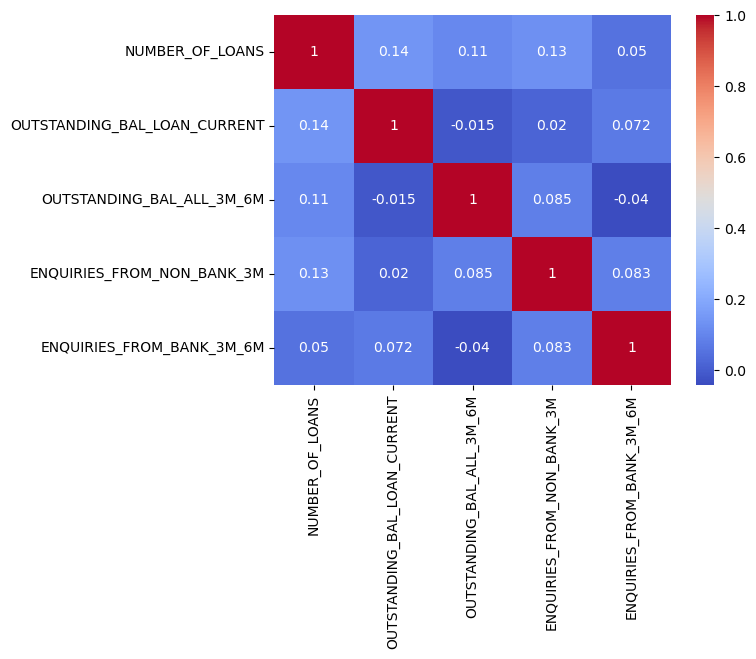

In [7]:
data =  data.drop(columns=['OUTSTANDING_BAL_ALL_3M','NUM_NEW_LOAN_TAKEN_BANK_12M','NUM_NEW_LOAN_TAKEN_12M','NUMBER_OF_RELATIONSHIP_BANK','OUTSTANDING_BAL_LOAN_6M'])
corr_data = data.drop(columns=['customer_id','label']).corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.show()

In [8]:
X = data.drop(columns=['customer_id','label'])
y = data['label']
X.head(10)

,NUMBER_OF_LOANS,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_ALL_3M_6M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FROM_BANK_3M_6M
0,1.00,"1,000,000.00","1,000,000.00",7.00,-3.00
1,10.00,"1,000,250.00","1,000,013.54",12.00,-3.00
2,13.00,"1,000,360.00","1,000,011.63",12.00,7.00
3,7.00,"1,000,040.00","1,000,009.83",7.00,4.22
4,8.42,"1,000,200.00","1,000,012.61",7.00,2.00
5,4.00,"1,000,100.00","1,000,016.92",7.00,-3.00
6,13.00,"1,001,670.00","1,000,007.74",7.00,3.11
7,19.00,"1,000,450.00","1,000,009.74",12.00,-3.00
8,7.00,"1,000,290.00","1,000,018.52",7.00,-3.00
9,10.00,"1,000,260.00","1,000,011.59",12.00,-3.00


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = AdaBoostClassifier(algorithm='SAMME')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

True positives: 418
False positives: 1
True negatives: 4910
False negatives: 671

Accuracy: 0.888
Precision: 0.9976133651551312
Recall: 0.3838383838383838


In [15]:
feature_importances = pd.DataFrame({
    'features': X_test.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index(drop=True)

print(feature_importances)

                       features  importance
0    ENQUIRIES_FROM_NON_BANK_3M        0.02
1     ENQUIRIES_FROM_BANK_3M_6M        0.04
2     OUTSTANDING_BAL_ALL_3M_6M        0.11
3               NUMBER_OF_LOANS        0.40
4  OUTSTANDING_BAL_LOAN_CURRENT        0.43


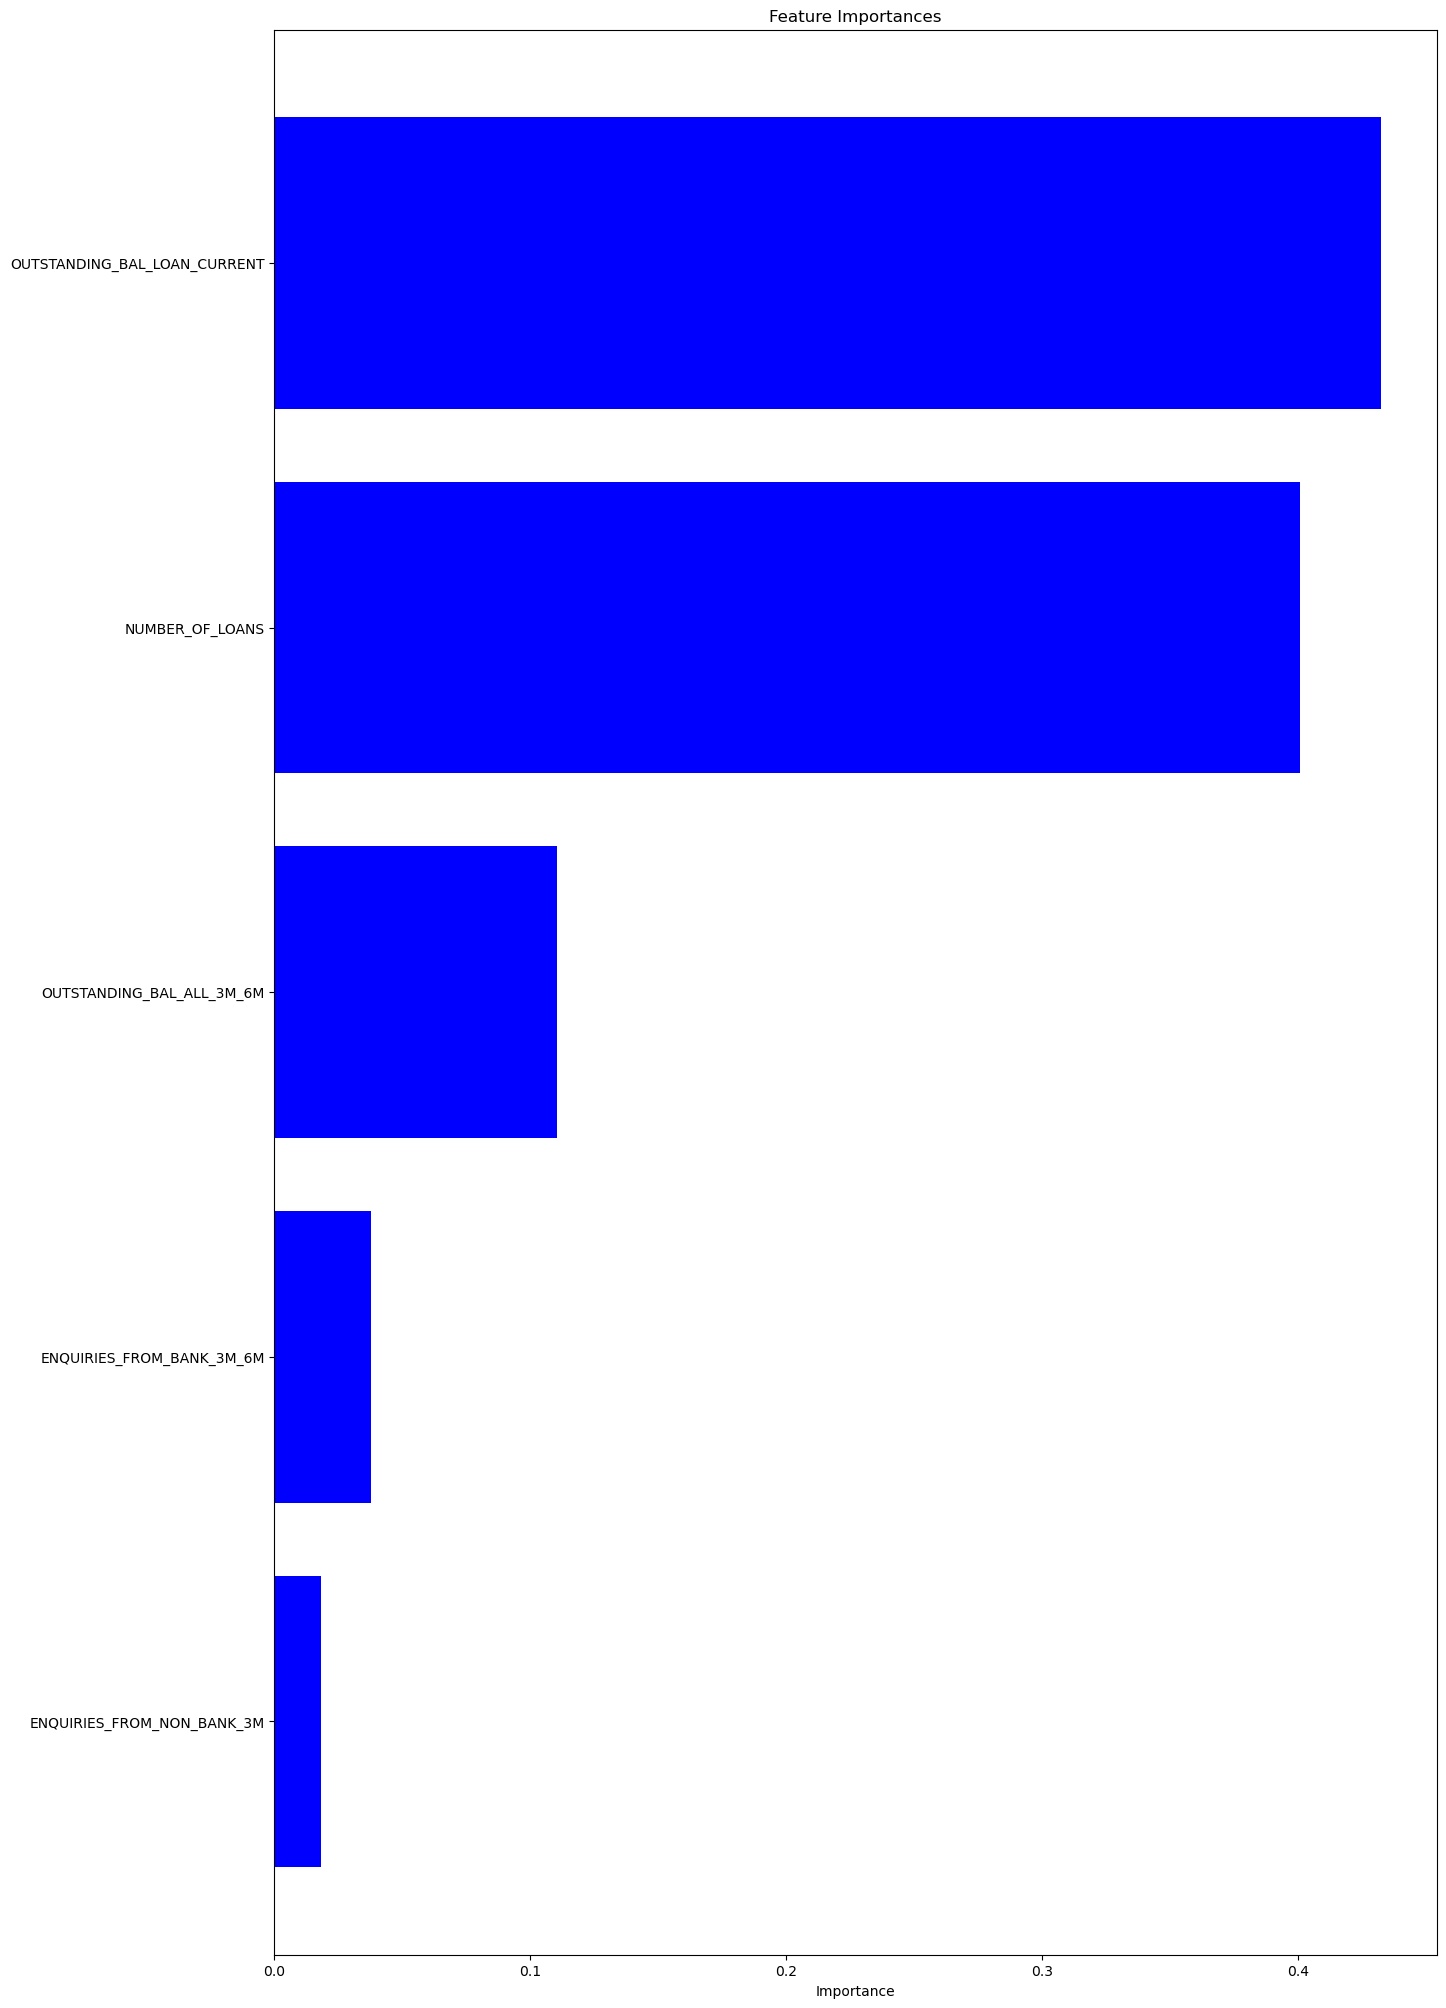

In [16]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

**Phân nhóm dữ liệu của các features để tạo các mốc điểm**

Dùng KBinsDiscretizer để chia các biến liên tục thành các nhóm

In [12]:
binning = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = binning.fit_transform(X)

**Tính toán WOE (Weight of Evidence)**